In [1]:
# In the first cell of your notebook, import the required packages with their customary aliases as follows:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the GDP dataset into your notebook as a DataFrame called gdp_df
gdp_df = pd.read_csv("C:/Users/ndidi/Documents/NSS_Projects/un-exploration-ndidiox/data/UNdata_Export_20230920_024356744.csv")

# inspect first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


In [3]:
# inspect last 10 rows
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [4]:
# drop Value Footnotes Column
gdp_df = gdp_df.drop('Value Footnotes', axis=1)

In [5]:
# rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [6]:
# How many rows and columns does gdp_df have? 
gdp_df.shape

(7176, 3)

#### The gdp_df dataframe has 7176 rows and 3 columns.

In [7]:
# What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

#### The 'Country" column is an object data type, the 'Year' column is an integer data type, and the 'GDP_Per_Capita' column is a float data type. All are the expected data types.

In [8]:
# Which years are represented in this dataset?
year = gdp_df["Year"].unique()
year

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990], dtype=int64)

In [9]:
# Take a look at the number of observations per year. What do you notice?
gdp_df.groupby(by='Year')['Country'].count()

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64

#### The years 1990 - 2020 are represented in this dataframe. As the years increase, the number of observations increase as well.

In [10]:
# How many countries are represented in this dataset? 
# Which countries are least represented in the dataset? 
# Why do you think these countries have so few observations?
countries = gdp_df["Country"].nunique()
countries

242

In [11]:
gdp_df['Country'].value_counts()

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

#### There are 242 countries represented in the dataset. The least represented countries are Somalia and Djibouti. Somali and Djibouti have so few observations likely because they are least developed and so there is a lack of resources for proper documentation.

In [12]:
# Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df[gdp_df["Year"] == 2014]
gdp_2014

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472
...,...,...,...
7031,Vietnam,2014,7601.858491
7062,West Bank and Gaza,2014,5967.073437
7089,World,2014,15224.439424
7120,Zambia,2014,3450.037600


In [13]:
# Use .describe() to find the summary statistics for GDP per capita in 2014.
gdp_2014[['GDP_Per_Capita']].describe()

,GDP_Per_Capita
count,242.000000
mean,19612.875611
std,20961.714572
min,822.611195
25%,4702.212961
50%,12178.874687
75%,26461.384188
max,155201.740571


<Axes: >

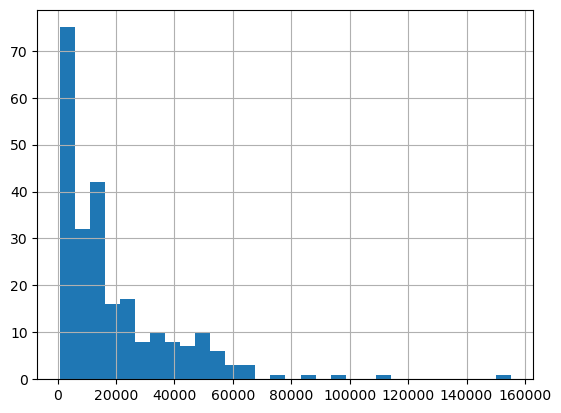

In [14]:
# Create a histogram of GDP Per Capita numbers for 2014. How would you describe the shape of the distribution?
gdp_2014['GDP_Per_Capita'].hist(bins = 30)

#### The histogram's distribution is right-skewed.

In [15]:
# Find the top 5 countries and bottom 5 countries by GDP per capita in 2018.
gdp_2018 = gdp_df[gdp_df["Year"] == 2018]
gdp_2018

,Country,Year,GDP_Per_Capita
2,Afghanistan,2018,2033.804389
21,Africa Eastern and Southern,2018,3697.317275
52,Africa Western and Central,2018,4132.592996
83,Albania,2018,13317.092313
114,Algeria,2018,11630.679409
...,...,...,...
7027,Vietnam,2018,9548.700016
7058,West Bank and Gaza,2018,6318.210068
7085,World,2018,16679.316815
7116,Zambia,2018,3521.545978


In [16]:
gdp_2018.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961
...,...,...,...
4752,Niger,2018,1200.402348
5873,Somalia,2018,1129.531464
1526,Dem. Rep. Congo,2018,1085.893688
1138,Central African Republic,2018,933.109951


#### The top 5 countries by GDP Per Capita in 2018 are Macao SAR, China, Luxembourg, Singapore, Qatar and Ireland. The bottom 5 countries by GDP Per Capita in 2018 are Niger, Somalia, Democratic Republic of Congo, Central African Republic and Burundi.

In [17]:
# Now, return to the full dataset, gdp_df.
# Pivot the data for 1990 and 2018 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. 
# Drop any rows that are missing values for either 1990 or 2018. 
# Save the result to a dataframe named gdp_pivoted.

gdp_pivoted = pd.pivot_table(gdp_df, values='GDP_Per_Capita',
                            index='Country',
                            columns='Year')

gdp_pivoted = gdp_pivoted[[1990, 2018]]

gdp_pivoted = gdp_pivoted.dropna(axis=0)

gdp_pivoted

Year,1990,2018
Country,,
Africa Eastern and Southern,3083.976800,3697.317275
Africa Western and Central,2810.341129,4132.592996
Albania,4827.034551,13317.092313
Algeria,8746.340762,11630.679409
Angola,5758.950488,6982.129420
...,...,...
Vanuatu,2855.554643,3093.086718
Vietnam,2066.372215,9548.700016
World,9704.621768,16679.316815


In [18]:
# Create a new column in gdp_pivoted named Percent_Change. 
# This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. 
# Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2018] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,2018,Percent_Change
Country,,,
Africa Eastern and Southern,3083.976800,3697.317275,19.887973
Africa Western and Central,2810.341129,4132.592996,47.049515
Albania,4827.034551,13317.092313,175.885581
Algeria,8746.340762,11630.679409,32.977661
Angola,5758.950488,6982.129420,21.239615
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Vietnam,2066.372215,9548.700016,362.099710
World,9704.621768,16679.316815,71.869829


In [19]:
# How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?

gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]

Year,1990,2018,Percent_Change
Country,,,
Brunei,71232.789430,60389.184647,-15.222772
Burundi,1184.842032,761.524143,-35.727791
Central African Republic,1201.674665,933.109951,-22.349203
Congo,5068.286948,3928.427999,-22.490024
Dem. Rep. Congo,1819.723315,1085.893688,-40.326440
Fragile and conflict affected situations,4874.531032,4719.134649,-3.187925
Gabon,18179.170002,14743.698243,-18.897847
Guinea-Bissau,1994.661475,1901.931739,-4.648896
Haiti,3541.410107,3165.304896,-10.620211


In [20]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].nunique()

Year
1990              17
2018              17
Percent_Change    17
dtype: int64

#### 16 countries experienced a negative percent change in GDP Per Capita from 1990 to 2018; 17 if you include 'Fragile and conflict affected situations'

In [21]:
# Which country had the highest % change in GDP per capita?

gdp_pivoted[gdp_pivoted['Percent_Change'] > 0].sort_values(by='Percent_Change', ascending=False)

Year,1990,2018,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,20386.013868,1860.221820
China,1423.896348,15133.995618,962.857956
Myanmar,564.227113,4467.858550,691.854635
East Asia & Pacific (excluding high income),2186.623227,13727.535687,527.796116
East Asia & Pacific (IDA & IBRD),2211.871578,13879.999224,527.522835
...,...,...,...
Vanuatu,2855.554643,3093.086718,8.318247
Oman,30333.874281,32594.690302,7.453107
Niger,1124.115620,1200.402348,6.786377


#### Equatorial Guinea had the highest percent change in GDP per capita.

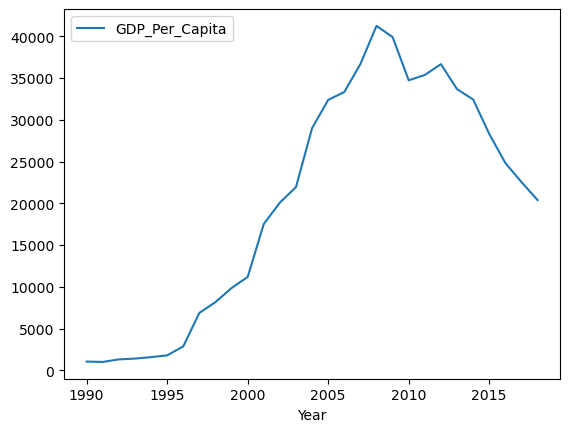

In [22]:
# Create a line plot showing this country's GDP per capita for all years from 1990 to 2018.

eq_guinea = gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') & (gdp_df['Year'] <= 2018)]
eq_guinea.plot.line(x='Year', y='GDP_Per_Capita');

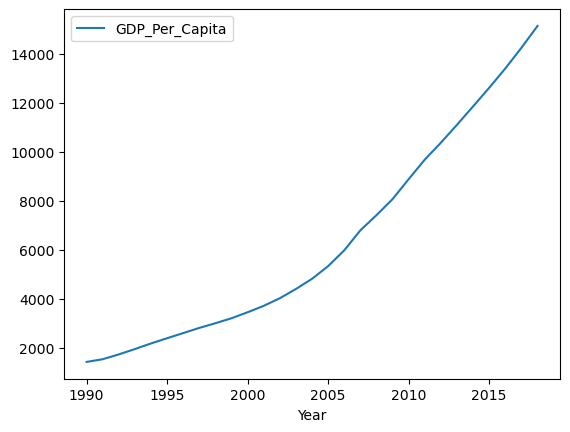

In [23]:
# Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

china = gdp_df[(gdp_df['Country'] == 'China') & (gdp_df['Year'] <= 2018)]
china.plot.line(x='Year', y='GDP_Per_Capita');

#### China's change in GDP is much more steady and stable in comparison to Equatorial Guinea's change in GDP that is not continuous and has peaks followed by some decline.

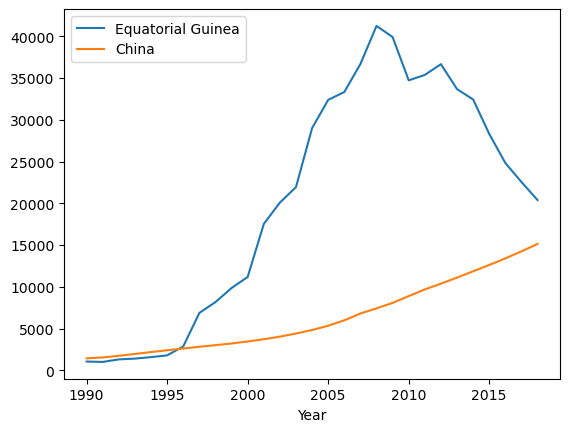

In [24]:
# Bonus: Put both line charts on the same plot.

axes = plt.gca()
eq_guinea.plot.line(x='Year', y='GDP_Per_Capita', label='Equatorial Guinea', ax=axes);
china.plot.line(x='Year', y='GDP_Per_Capita', label='China', ax=axes);

In [25]:
# Read in continents.csv contained in the data folder into a new dataframe called continents. 
# We will be using this dataframe to add a new column to our dataset.

continents = pd.read_csv('C:/Users/ndidi/Documents/NSS_Projects/un-exploration-ndidiox/data/continents.csv')
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


In [26]:
# Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

gdp_df = pd.merge(
     continents, gdp_df, on=["Country"]
)

gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2020,1970.560169
1,Asia,Afghanistan,2019,2065.036235
2,Asia,Afghanistan,2018,2033.804389
3,Asia,Afghanistan,2017,2058.400221
4,Asia,Afghanistan,2016,2057.067978
...,...,...,...,...
5577,Africa,Zimbabwe,1994,2603.927369
5578,Africa,Zimbabwe,1993,2420.092791
5579,Africa,Zimbabwe,1992,2437.152908
5580,Africa,Zimbabwe,1991,2733.696626


In [27]:
# Determine the number of countries per continent.
countries_per_continent = gdp_df.groupby('Continent')['Country'].nunique()
countries_per_continent

Continent
Africa           50
Asia             42
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

<Axes: xlabel='Continent'>

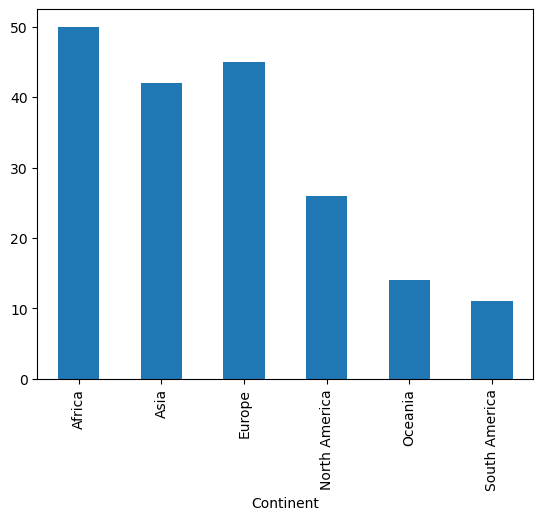

In [28]:
# Create a bar chart showing this.
countries_per_continent.plot.bar()

<Axes: xlabel='Continent', ylabel='GDP_Per_Capita'>

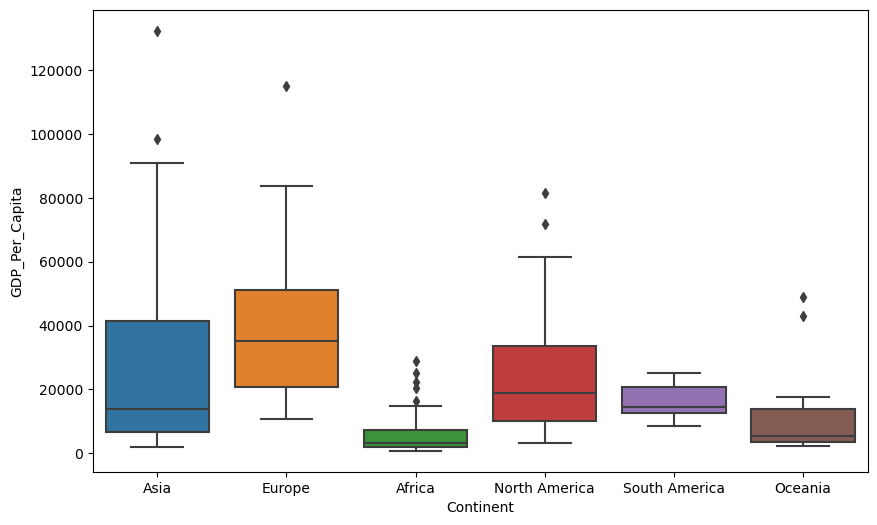

In [29]:
# Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. 
# What do you notice?
plt.figure(figsize=(10,6))
sns.boxplot(data=gdp_df[gdp_df['Year'] == 2018], x='Continent', y='GDP_Per_Capita')

In [30]:
# Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. 
# Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. 
# Modify your read_csv call to correc this without modifying the original csv file.

life_expectancy = pd.read_csv("C:/Users/ndidi/Documents/NSS_Projects/un-exploration-ndidiox/data/Life_Expectancy.csv", skiprows=3)
life_expectancy.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN


In [31]:
# Drop the Country Code, Indicator Name, and Indicator Code columns. 
# Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple columns per year, we want to have multiple rows per country and a single column for year. 
# After melting, rename the columns to Country, Year, and Life_Expectancy.

life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])
life_expectancy = pd.melt(life_expectancy, id_vars=['Country Name'], var_name='Year', value_name='Life_Expectancy')
life_expectancy = life_expectancy.rename(columns={'Country Name': 'Country'})

In [32]:
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000
...,...,...,...
17019,Kosovo,Unnamed: 67,NaN
17020,"Yemen, Rep.",Unnamed: 67,NaN
17021,South Africa,Unnamed: 67,NaN
17022,Zambia,Unnamed: 67,NaN


In [33]:
# What was the first country with a life expectancy to exceed 80?

life_expectancy[life_expectancy["Life_Expectancy"]>=80].sort_values(by=["Year"])

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16304,Faroe Islands,2021,83.497561
16307,United Kingdom,2021,80.700000
16315,Greece,2021,80.182927
16334,Isle of Man,2021,80.525000


#### The first country with a life expectancy to exceed 80 was Japan in 1996.

In [37]:
# Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. 
# Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. 
# Look at the first five rows of your new data frame to confirm it merged correctly. 
# Also, check the last five rows to make sure the data is clean and as expected.
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5582 entries, 0 to 5581
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5582 non-null   object 
 1   Country         5582 non-null   object 
 2   Year            5582 non-null   int64  
 3   GDP_Per_Capita  5582 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 218.0+ KB


In [38]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          17024 non-null  object 
 1   Year             17024 non-null  object 
 2   Life_Expectancy  15866 non-null  float64
dtypes: float64(1), object(2)
memory usage: 399.1+ KB


In [46]:
life_expectancy['Year'] = pd.to_numeric(life_expectancy['Year'], errors='coerce')
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          17024 non-null  object 
 1   Year             16758 non-null  float64
 2   Life_Expectancy  15866 non-null  float64
dtypes: float64(2), object(1)
memory usage: 399.1+ KB


In [44]:
gdp_le = gdp_df.merge(life_expectancy, on=['Country','Year'], how='outer')

In [47]:
gdp_le.head(5)

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
0,Asia,Afghanistan,2020.0,1970.560169,62.575
1,Asia,Afghanistan,2019.0,2065.036235,63.565
2,Asia,Afghanistan,2018.0,2033.804389,63.081
3,Asia,Afghanistan,2017.0,2058.400221,63.016
4,Asia,Afghanistan,2016.0,2057.067978,63.136


In [48]:
gdp_le.tail(5)

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
17360,NaN,Kosovo,NaN,NaN,NaN
17361,NaN,"Yemen, Rep.",NaN,NaN,NaN
17362,NaN,South Africa,NaN,NaN,NaN
17363,NaN,Zambia,NaN,NaN,NaN
17364,NaN,Zimbabwe,NaN,NaN,NaN


In [51]:
# Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. 
# How many countries have a life expectancy of at least 80 in 2019?

gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()
gdp_le_2019

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
1,Asia,Afghanistan,2019.0,2065.036235,63.565000
20,Europe,Albania,2019.0,13653.201570,79.282000
51,Africa,Algeria,2019.0,11521.984210,76.474000
82,Africa,Angola,2019.0,6712.021615,62.448000
113,North America,Antigua and Barbuda,2019.0,21850.133412,78.691000
...,...,...,...,...,...
16472,NaN,"Venezuela, RB",2019.0,NaN,72.161000
16473,NaN,British Virgin Islands,2019.0,NaN,75.863000
16474,NaN,Virgin Islands (U.S.),2019.0,NaN,79.668293
16475,NaN,World,2019.0,NaN,72.979716


In [52]:
gdp_le_2019[gdp_le_2019['Life_Expectancy']>=80]['Country'].count()

47

#### 47 countries have a life expectancy of at least 80 in 2019.

In [55]:
# Find the countries that had the top 3 largest GDP per capita figures for 2019. 
top_3 = gdp_le_2019.sort_values('GDP_Per_Capita', ascending=False).head(3)
top_3

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
2994,Asia,"Macao SAR, China",2019.0,127272.548511,84.978000
2963,Europe,Luxembourg,2019.0,116518.276815,82.639024
4574,Asia,Singapore,2019.0,98283.308908,83.595122


In [75]:
# Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. 
# Each individual figure in the facet grid will represent a single country.

top_3_over_time = gdp_le[gdp_le['Country'].isin(['Macao SAR, China', 'Luxembourg', 'Singapore'])].copy()
top_3_over_time

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy
2962,Europe,Luxembourg,2020.0,112557.309472,82.143902
2963,Europe,Luxembourg,2019.0,116518.276815,82.639024
2964,Europe,Luxembourg,2018.0,115049.926079,82.295122
2965,Europe,Luxembourg,2017.0,114985.842236,82.095122
2966,Europe,Luxembourg,2016.0,116283.699681,82.685366
...,...,...,...,...,...
16979,NaN,"Macao SAR, China",2022.0,NaN,NaN
17041,NaN,Singapore,2022.0,NaN,NaN
17243,NaN,Luxembourg,NaN,NaN,NaN
17245,NaN,"Macao SAR, China",NaN,NaN,NaN


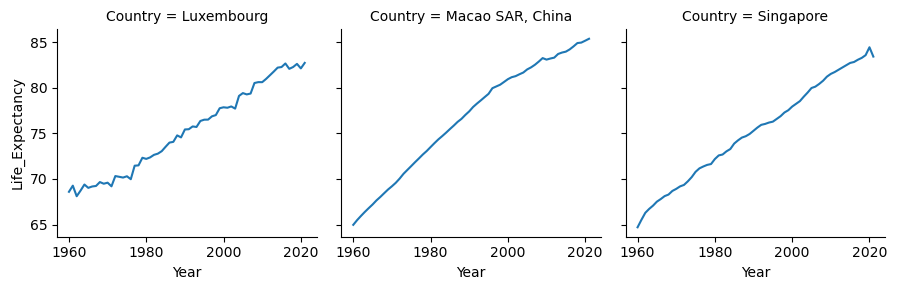

In [76]:
graph = sns.FacetGrid(top_3_over_time, col='Country')
graph.map(sns.lineplot, 'Year', 'Life_Expectancy').add_legend();

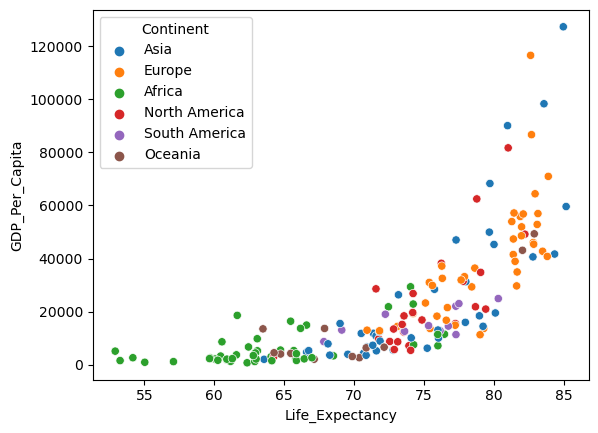

In [57]:
# Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?
sns.scatterplot(gdp_le_2019, 
                x="Life_Expectancy", 
                y="GDP_Per_Capita", 
                hue="Continent");

In [58]:
# Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?
gdp_le_2019[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.726147
GDP_Per_Capita,0.726147,1.000000


In [61]:
# Add a column to gdp_le_2019 and calculate the logarithm of GDP per capita. 
gdp_le_2019['Log_of_GDP_Per_Capita'] = np.log(gdp_le_2019.GDP_Per_Capita)
gdp_le_2019.head()

,Continent,Country,Year,GDP_Per_Capita,Life_Expectancy,Log_of_GDP_Per_Capita
1,Asia,Afghanistan,2019.0,2065.036235,63.565,7.632903
20,Europe,Albania,2019.0,13653.201570,79.282,9.521729
51,Africa,Algeria,2019.0,11521.984210,76.474,9.352012
82,Africa,Angola,2019.0,6712.021615,62.448,8.811655
113,North America,Antigua and Barbuda,2019.0,21850.133412,78.691,9.991962


In [62]:
# Find the correlation between the log of GDP per capita and life expectancy.
# How does this compare to the calculation in the previous part? 
gdp_le_2019['Log_of_GDP_Per_Capita'].corr(gdp_le_2019['Life_Expectancy'])

0.8627345814622117

<Axes: xlabel='Log_of_GDP_Per_Capita', ylabel='Life_Expectancy'>

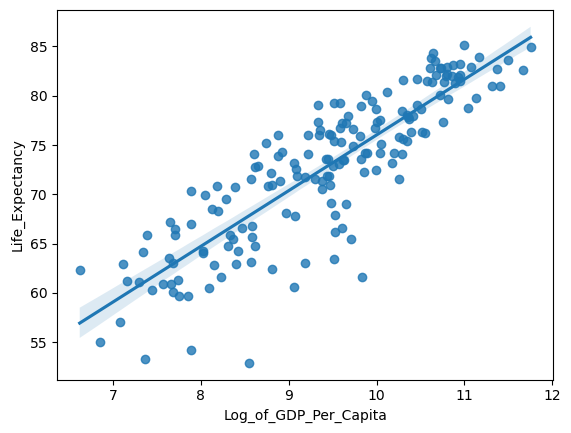

In [63]:
# Look at a scatter plot to see if the result of this calculation makes sense.
sns.regplot(x="Log_of_GDP_Per_Capita", y="Life_Expectancy", data = gdp_le_2019)